# Problema 1

In [2]:
import numpy as np

In [5]:
def F1(x,y):
    """
    Función que regresa el valor de la función 1 y el valor de sus dos derivadas parciales para x y y.
    """
    return x**3-y**(3/5)-2,3*x**2,-3*y**(-2/5)/5

In [6]:
def F2(x,y):
    """
    Función que regresa el valor de la función 2 y el valor de sus dos derivadas parciales para x y y.
    """
    return np.exp(5*x/3)-x*y-9,5*np.exp(5*x/3)/3-y,-x

In [7]:
def JacobianoInverso(x,y):
    """
    Función que calcula el Jacobiano inverso de las dos funciones F1 y F2, una matriz compuesta de las derivadas parciales.
    """
    _,df1dx,df1dy=F1(x,y)
    _,df2dx,df2dy=F2(x,y)
    jacobiano=np.matrix([[df1dx,df1dy],
                        [df2dx,df2dy]])
    jacobianoInverso=np.linalg.inv(jacobiano)
    return jacobianoInverso

In [49]:
def SistemaEcuaciones(x0,y0,n):
    """
    Función que obtiene una solución para las dos variables x y y del sistema de ecuaciones compuesto por F1 y F2 y el
    error estimado para ambas ecuaciones.
    """
    p=0
    while p<=n:
        f1,_,_=F1(x0,y0)
        f2,_,_=F2(x0,y0)
        g1=0-f1
        g2=0-f2
        delta=np.matrix([g1,
                         g2])
        solucion=JacobianoInverso(x0,y0)*delta.reshape(2,1)
        x0+=np.array(solucion)[0][0]
        y0+=np.array(solucion)[1][0]
        p+=1
        errores=(g1,g2)
    return x0,y0,errores

In [65]:
SistemaEcuaciones(100,20,1000)

(6.998913314598443,
 16630.993482090038,
 (5.684341886080802e-14, -2.9103830456733704e-11))

# Problema 2

In [66]:
import matplotlib.pyplot as plt

In [67]:
F0=8.494 # [kmol/h]
V=4.160 # [m^3]
tau=9.862 #[h]

In [71]:
def Concentración(t):
    C=F0*t*np.exp(t/tau)/V
    dCdt=(F0/V)*(np.exp(t/tau)+t*np.exp(t/tau)/tau)
    return C,dCdt

In [72]:
def TiempoConcentrción(Cx,n,t0):
    p=0
    while p<=n:
        C,dCdt=Concentración(t0)
        t0=t0-(Cx-C)/(-dCdt)
        p+=1
    return t0,(Cx-C)

In [75]:
TiempoConcentrción(0.224,100,1)

(0.1085052690819086, 0.0)

In [86]:
t_prueba=np.arange(0,0.15,0.0001)
C_prueba,_=Concentración(t_prueba)

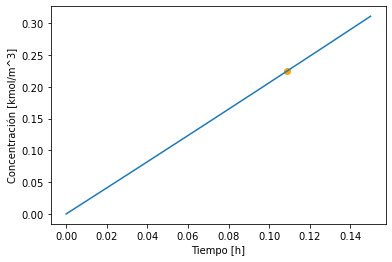

In [87]:
plt.plot(t_prueba,C_prueba)
plt.scatter(TiempoConcentrción(0.224,100,1)[0],Concentración(TiempoConcentrción(0.224,100,1)[0])[0],c='orange')
plt.xlabel('Tiempo [h]')
plt.ylabel('Concentración [kmol/m^3]')
plt.show()